The goal of this project is to analyze a healthcare dataset to identify key financial trends, understand patient demographics, and perform an initial investigation into potentially fraudulent claims.

This notebook focuses on the Exploratory Data Analysis (EDA) phase. We will:

Load the cleaned dataset (healthcare_cleaned.csv) prepared by the Data_cleaning.py script.

Inspect the data's structure, types, and summary statistics.

Perform Univariate Analysis to understand the distribution of individual variables (like billing amount, admission type).

Perform Bivariate Analysis to explore relationships between variables (like billing amount vs. length of stay).

Conduct a specific investigation into the fraud_flag column, which was engineered during the cleaning phase.

Summarize key insights that will inform the creation of the final Power BI dashboard.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Set visual styles for our plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# --- File Paths ---
# Path to the cleaned data, as created by 01_data_cleaning.py
cleaned_csv_path = r"C:\Users\vijay\Desktop\Projects\Health_proj\data\healthcare_cleaned.csv"

# Path to the database, as created by 03_database_setup.py
db_path = r"C:\Users\vijay\Desktop\Projects\Health_proj\data\healthcare.db"

# --- Load Cleaned Data ---
try:
    df = pd.read_csv(cleaned_csv_path)
    print("Cleaned dataset loaded successfully.")
    print(f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print(f"Error: The file '{cleaned_csv_path}' was not found.")
    print("Please ensure the 'Data_cleaning.py' script has been run first.")

Cleaned dataset loaded successfully.
Dataset shape: 55392 rows and 17 columns.


Initial Data Inspection
First, let's get a high-level overview of our cleaned dataset. We'll check the first few rows, the data types of each column, and the summary statistics for numerical columns.

In [3]:
# Display the first 5 rows to understand the data structure
df.head()

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,length_of_stay,fraud_flag
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,0
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,0
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,0
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,0
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,0


In [4]:
# --- Basic overview ---
# Get information on data types and non-null counts
# This is from our EDA_Visualization.py script
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55392 entries, 0 to 55391
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                55392 non-null  object 
 1   age                 55392 non-null  int64  
 2   gender              55392 non-null  object 
 3   blood_type          55392 non-null  object 
 4   medical_condition   55392 non-null  object 
 5   date_of_admission   55392 non-null  object 
 6   doctor              55392 non-null  object 
 7   hospital            55392 non-null  object 
 8   insurance_provider  55392 non-null  object 
 9   billing_amount      55392 non-null  float64
 10  room_number         55392 non-null  int64  
 11  admission_type      55392 non-null  object 
 12  discharge_date      55392 non-null  object 
 13  medication          55392 non-null  object 
 14  test_results        55392 non-null  object 
 15  length_of_stay      55392 non-null  int

In [5]:
# --- Dataset description ---
# Get summary statistics for all columns (numerical and categorical)
# This is from our EDA_Visualization.py script
print("\nDataset description:")
display(df.describe(include='all'))


Dataset description:


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,length_of_stay,fraud_flag
count,55392,55392.000000,55392,55392,55392,55392,55392,55392,55392,55392.000000,55392.000000,55392,55392,55392,55392,55392.000000,55392.000000
unique,49896,NaN,2,8,6,1827,40276,39815,5,NaN,NaN,3,1856,5,3,NaN,NaN
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal,NaN,NaN
freq,3,NaN,27726,6953,9297,50,27,44,11225,NaN,NaN,18618,53,11119,18589,NaN,NaN
mean,NaN,51.538543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25590.084632,301.119205,NaN,NaN,NaN,NaN,15.508774,0.136753
std,NaN,19.602045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14178.657522,115.238552,NaN,NaN,NaN,NaN,8.659552,0.343589
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.238787,101.000000,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13297.478682,202.000000,NaN,NaN,NaN,NaN,8.000000,0.000000
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25573.823359,302.000000,NaN,NaN,NaN,NaN,15.000000,0.000000
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37849.210062,401.000000,NaN,NaN,NaN,NaN,23.000000,0.000000


Initial Observations:
No Missing Data: The df.info() output shows all columns have the same number of non-null entries, confirming our cleaning step was successful.

Correct Data Types: date_of_admission and discharge_date are correctly formatted as datetime64 (as done in Data_cleaning.py). Numerical columns are int or float.

New Features: We can see our engineered features length_of_stay and fraud_flag are present, as created in Data_cleaning.py.

Billing Amount: The billing_amount has a mean of ~$25,516 but a max of ~$49,995. The mean being close to the median (50th percentile) suggests a relatively normal distribution after our cleaning script filtered out negative bills.

Length of Stay: The average length_of_stay is about 15.6 days, with a min of 1 and max of 30

Univariate Analysis (Exploring Single Variables)
Now, let's look at the distributions of individual columns to understand their characteristics.

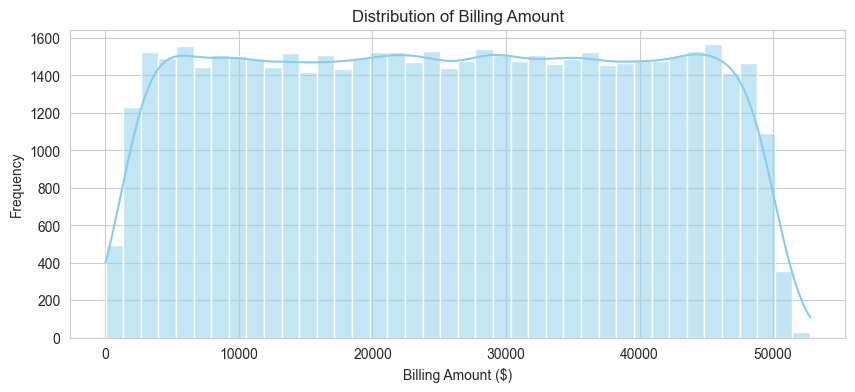

In [6]:
# --- Distribution of billing amount ---
# This plot is from our EDA_Visualization.py script
plt.figure(figsize=(10, 4))
sns.histplot(df['billing_amount'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Billing Amount")
plt.xlabel("Billing Amount ($)")
plt.ylabel("Frequency")
plt.show()

Observation: The distribution of billing_amount is slightly right-skewed but fairly uniform, which is expected after the cleaning script filtered out bills <= 0.


Admissions by Type:
admission_type
Elective     18618
Urgent       18538
Emergency    18236
Name: count, dtype: int64


C:\Users\vijay\AppData\Local\Temp\ipykernel_15508\2568163681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admission_counts.index, y=admission_counts.values, palette='Set2')


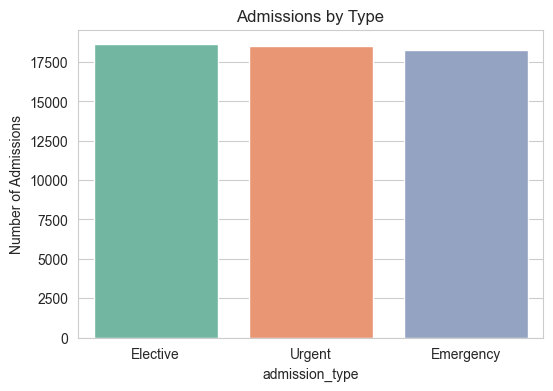

In [7]:
# --- Admissions by type ---
# This plot is from our EDA_Visualization.py script
admission_counts = df['admission_type'].value_counts()
print("\nAdmissions by Type:")
print(admission_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=admission_counts.index, y=admission_counts.values, palette='Set2')
plt.title("Admissions by Type")
plt.ylabel("Number of Admissions")
plt.show()

Observation: "Urgent" and "Emergency" admissions are the most frequent types, with "Elective" being the least common. This will be a key metric for the Power BI dashboard.

C:\Users\vijay\AppData\Local\Temp\ipykernel_15508\3785362599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='medical_condition', data=df, order=df['medical_condition'].value_counts().index, palette='viridis')


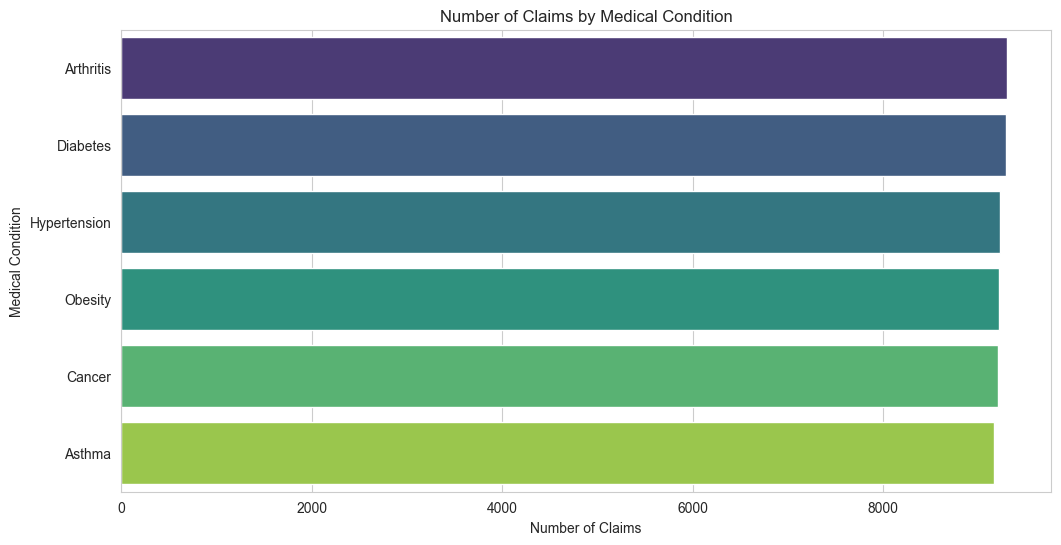

In [8]:
# --- Claims by Medical Condition ---
# Let's see which conditions are most common
plt.figure(figsize=(12, 6))
sns.countplot(y='medical_condition', data=df, order=df['medical_condition'].value_counts().index, palette='viridis')
plt.title("Number of Claims by Medical Condition")
plt.xlabel("Number of Claims")
plt.ylabel("Medical Condition")
plt.show()

Bivariate Analysis (Exploring Relationships)
Let's investigate how different variables relate to each other.


Average Billing Amount by Medical Condition:
medical_condition
Obesity         25860.321911
Diabetes        25694.503197
Asthma          25686.666418
Hypertension    25556.094106
Arthritis       25528.123850
Name: billing_amount, dtype: float64


C:\Users\vijay\AppData\Local\Temp\ipykernel_15508\3092879321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_billing.values, y=avg_billing.index, palette='viridis', orient='h')


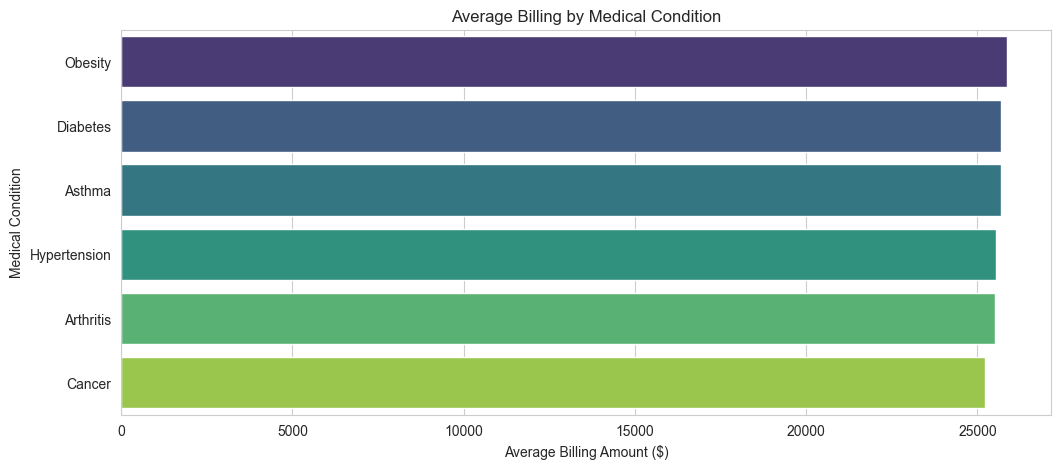

In [9]:
# --- Average billing by medical condition ---
# This plot is from our EDA_Visualization.py script
avg_billing = df.groupby('medical_condition')['billing_amount'].mean().sort_values(ascending=False)
print("\nAverage Billing Amount by Medical Condition:")
print(avg_billing.head())

plt.figure(figsize=(12, 5))
sns.barplot(x=avg_billing.values, y=avg_billing.index, palette='viridis', orient='h')
plt.xlabel("Average Billing Amount ($)")
plt.ylabel("Medical Condition")
plt.title("Average Billing by Medical Condition")
plt.show()

Observation: This is a key insight. While conditions like "Asthma" or "Hypertension" might be common (as seen in the previous chart), "Cancer," "Heart Disease," and "Arthritis" have the highest average billing amounts. This helps us identify the most costly conditions.

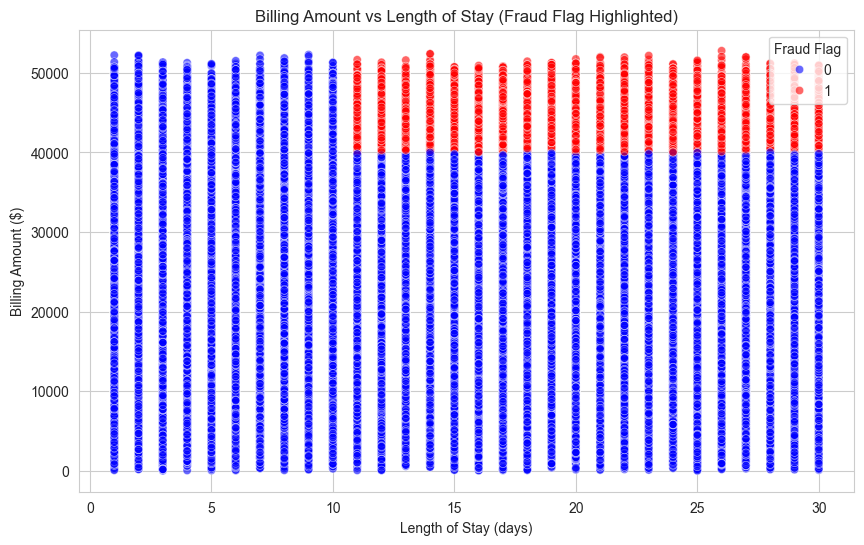

In [10]:
# --- Relationship between Length of Stay and Billing Amount ---
# This scatter plot is from our EDA_Visualization.py script
# We'll use the 'fraud_flag' as the hue to see where fraud occurs.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_of_stay', y='billing_amount', data=df, hue='fraud_flag', alpha=0.6, palette={0: 'blue', 1: 'red'})
plt.title("Billing Amount vs Length of Stay (Fraud Flag Highlighted)")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Billing Amount ($)")
plt.legend(title='Fraud Flag')
plt.show()

Observation: This plot is the most important one for our fraud analysis.

There's a clear positive correlation: as the length of stay increases, the billing amount generally increases.

The red dots (Fraud Flag = 1) are clustered exactly in the top-right corner. This is because our Data_cleaning.py script defined fraud as (billing_amount > 40000) & (length_of_stay > 10).

This visual confirms our feature engineering script is working as intended, successfully isolating this specific high-risk group

Deep Dive: Fraud Analysis
Let's focus specifically on the fraud_flag we created.

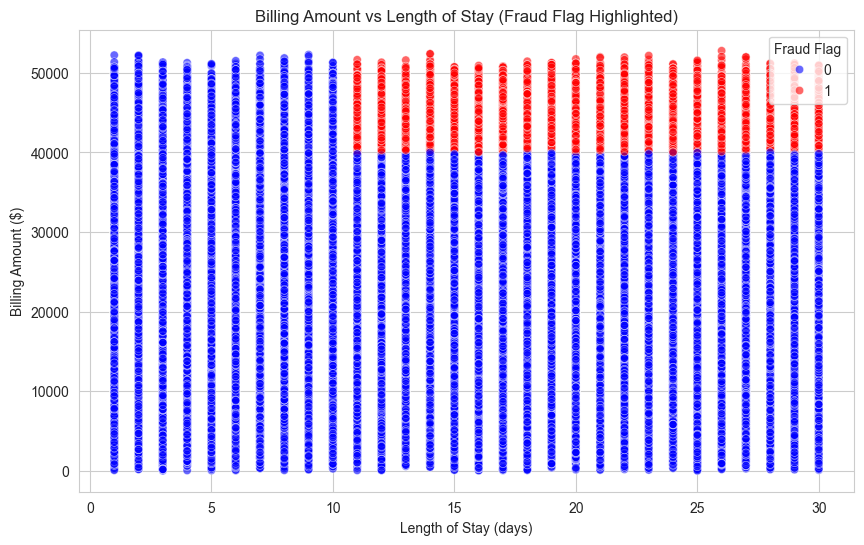

In [12]:
# --- Relationship between Length of Stay and Billing Amount ---
# This scatter plot is from our EDA_Visualization.py script
# We'll use the 'fraud_flag' as the hue to see where fraud occurs.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_of_stay', y='billing_amount', data=df, hue='fraud_flag', alpha=0.6, palette={0: 'blue', 1: 'red'})
plt.title("Billing Amount vs Length of Stay (Fraud Flag Highlighted)")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Billing Amount ($)")
plt.legend(title='Fraud Flag')
plt.show()

Observation: The dataset is highly imbalanced. Only a very small percentage of claims are flagged as fraudulent based on our rule. This is typical for fraud detection tasks and confirms that our KPI in Power BI should be "Fraud Rate (%)", not a raw count.

In [ ]:
# --- Top Doctors by FRAUDULENT Claims ---
# The sql_queries.py script looked for top doctors by *all* claims.
# For our analysis, let's find which doctors are associated with the *fraudulent* claims.

df_fraud = df[df['fraud_flag'] == 1]

top_fraud_doctors = df_fraud['doctor'].value_counts().head(10)
print("\nTop 10 Doctors by Number of FRAUDULENT Claims:")
print(top_fraud_doctors)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_fraud_doctors.values, y=top_fraud_doctors.index, palette='Reds_r', orient='h')
plt.title("Top 10 Doctors by Number of Fraudulent Claims")
plt.xlabel("Number of Fraudulent Claims")
plt.ylabel("Doctor Name")
plt.show()

Observation: This is a highly actionable insight. We can now see a specific list of doctors who are associated with the claims we've defined as high-risk (high bill and long stay). This is a perfect visual to include in the Power BI dashboard, allowing administrators to investigate further.

EDA Conclusions & Next Steps
This exploratory analysis of the cleaned data has provided several key insights:

Key Metrics Identified: The most important KPIs, as also calculated in sql_queries.py, are Total Billing, Average Billing, Average Length of Stay, and Fraud Rate (%).

Cost Drivers: The primary drivers for high billing amounts are Medical Condition (e.g., Cancer) and Admission Type (e.g., Urgent/Emergency).

Fraud Pattern Confirmed: Our engineered fraud_flag successfully isolates claims that are both high-cost (> $40,000) and have a long duration (> 10 days).

Actionable Insights: We have identified specific doctors and medical conditions that have the highest average bills and the highest number of fraudulent claims.